In [1]:
import numpy as np
import torch
import matplotlib.pyplot as plt
import pandas

# Number of sampling

In [2]:
N = 10000

# Constraints

$RH$ in range $[10000,100000]\ {\rm \Omega}$

$RL$ in range $[500000,2000000]\ {\rm \Omega}$

$RD$ in range $[1000, 20000]\ {\rm \mu m}$

$R_{base}$ in range $[30000, 100000]\ {\rm \mu m}$

$W$ in range $[200,800]\ {\rm \mu m}$

$L$ in range $[80,120]\ {\rm \mu m}$

In [3]:
range_rh  = [10000, 100000]
range_rl  = [500000, 2000000]
range_rd = [1000, 20000]
range_rb = [30000, 100000]
range_w = [200, 800]
range_l = [80, 120]

In [4]:
RANGE = torch.tensor([range_rh, range_rl, range_rd, range_rb, range_w, range_l])

In [5]:
ACT_sampling_mc =  torch.quasirandom.SobolEngine(6).draw(N)
ACT_sampling_mc = ACT_sampling_mc*(RANGE[:,1]-RANGE[:,0]) + RANGE[:,0]
ACT_sampling_mc = np.round(ACT_sampling_mc).T
ACT_sampling_mc.shape

torch.Size([6, 10000])

In [6]:
ACT_sampling_mc[4:,:] = ACT_sampling_mc[4:,:]/1000000
ACT_sampling_mc

tensor([[1.0000e+04, 5.5000e+04, 7.7500e+04,  ..., 8.3537e+04, 6.1037e+04,
         1.6037e+04],
        [5.0000e+05, 1.2500e+06, 8.7500e+05,  ..., 1.5072e+06, 1.1322e+06,
         1.8822e+06],
        [1.0000e+03, 1.0500e+04, 5.7500e+03,  ..., 1.4922e+04, 1.0172e+04,
         1.9672e+04],
        [3.0000e+04, 6.5000e+04, 4.7500e+04,  ..., 3.6259e+04, 8.8759e+04,
         5.3759e+04],
        [2.0000e-04, 5.0000e-04, 6.5000e-04,  ..., 7.8400e-04, 6.3400e-04,
         3.3400e-04],
        [8.0000e-05, 1.0000e-04, 1.1000e-04,  ..., 1.1500e-04, 1.0500e-04,
         8.5000e-05]])

In [7]:
np.savetxt('./data/sampling_pReLU.csv', ACT_sampling_mc, fmt='%f', delimiter=',')

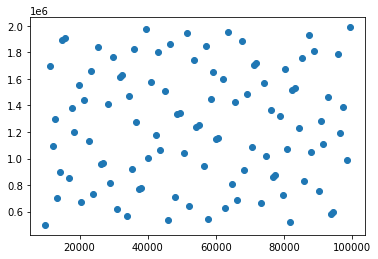

In [8]:
plt.scatter(ACT_sampling_mc[0,:100],ACT_sampling_mc[1,:100])

In [9]:
data = pandas.read_csv('./data/sampling_pReLU.csv', header=None)
data

,0,1,2,3,4,5,6,7,8,9,...,9990,9991,9992,9993,9994,9995,9996,9997,9998,9999
0,10000.00000,5.500000e+04,77500.00000,3.250000e+04,4.375000e+04,8.875000e+04,66250.000000,2.125000e+04,26875.000000,7.187500e+04,...,66662.000000,2.166200e+04,27287.000000,7.228700e+04,94787.000000,4.978700e+04,38537.000000,8.353700e+04,6.103700e+04,1.603700e+04
1,500000.00000,1.250000e+06,875000.00000,1.625000e+06,1.062500e+06,1.812500e+06,687500.000000,1.437500e+06,968750.000000,1.718750e+06,...,850922.000000,1.600922e+06,944672.000000,1.694672e+06,569672.000000,1.319672e+06,757172.000000,1.507172e+06,1.132172e+06,1.882172e+06
2,1000.00000,1.050000e+04,5750.00000,1.525000e+04,1.287500e+04,3.375000e+03,17625.000000,8.125000e+03,18812.000000,9.312000e+03,...,11359.000000,1.859000e+03,12547.000000,3.047000e+03,17297.000000,7.797000e+03,5422.000000,1.492200e+04,1.017200e+04,1.967200e+04
3,30000.00000,6.500000e+04,47500.00000,8.250000e+04,9.125000e+04,5.625000e+04,73750.000000,3.875000e+04,60625.000000,9.562500e+04,...,75634.000000,4.063400e+04,62509.000000,9.750900e+04,45009.000000,8.000900e+04,71259.000000,3.625900e+04,8.875900e+04,5.375900e+04
4,0.00020,5.000000e-04,0.00065,3.500000e-04,4.250000e-04,7.250000e-04,0.000575,2.750000e-04,0.000538,2.380000e-04,...,0.000296,5.960000e-04,0.000259,5.590000e-04,0.000709,4.090000e-04,0.000484,7.840000e-04,6.340000e-04,3.340000e-04
5,0.00008,1.000000e-04,0.00011,9.000000e-05,8.500000e-05,1.050000e-04,0.000115,9.500000e-05,0.000092,1.120000e-04,...,0.000118,9.800000e-05,0.000090,1.100000e-04,0.000100,8.000000e-05,0.000095,1.150000e-04,1.050000e-04,8.500000e-05
